In [ ]:
import requests as req 
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
html = req.get('https://www.worldometers.info/coronavirus/#countries') #get the data from path

In [ ]:
html.content

In [ ]:
html_parsed = BeautifulSoup(html.content)

In [ ]:
table = html_parsed.find('table', attrs={'id':'main_table_countries_today'}) #search for specfic table with id

In [ ]:
rows = table.find_all('tr') #find all rows from this table

In [ ]:
rows[0].text.strip().split('\n') #replace every \n with , for the first row

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/',
 '1M pop',
 '',
 'Population',
 'Continent',
 '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [ ]:
#replace every \n with , for all rows
data = [] #new lisf for rows
for i in rows:
  data.append(i.text.strip().split('\n')[1:5]) #[1:5] take sample from the data just the first 5 columns

In [ ]:
data #check the rows

In [ ]:
data = pd.DataFrame(data[9:], columns=data[0]) #convert the list to dataframe 

In [ ]:
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"94,024,925",,"1,059,210"
1,India,"44,174,650",,"526,772"
2,France,"34,079,658",,"152,711"
3,Brazil,"34,035,780",,"680,239"
4,Germany,"31,307,020",,"145,028"


In [ ]:
data.to_csv('covies19.csv') #save the data to csv file

In [ ]:
data_plot = data[['Country,Other', 'TotalCases']]

In [ ]:
data_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country,Other  238 non-null    object
 1   TotalCases     238 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [ ]:
data_plot['TotalCases'] = data_plot['TotalCases'].apply(lambda x:x.replace(',','')) #convert , in TotalCases nuber with nothing

In [ ]:
data_plot['TotalCases'] = pd.to_numeric(data_plot['TotalCases']) #convert the column to numeric

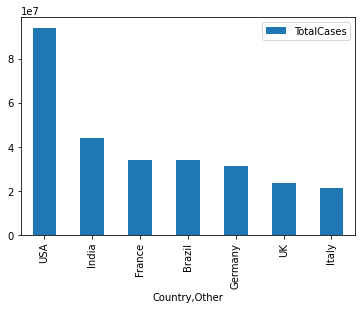

In [ ]:
data_plot[:7].plot(kind='bar', x='Country,Other', y='TotalCases') #plot the first 7 country